<a href="https://colab.research.google.com/github/ivanightingale/cirquits/blob/master/Deutsch's_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qq qiskit

     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 21.6MB 37.0MB/s 
     |████████████████████████████████| 92kB 25.0MB/s 
     |████████████████████████████████| 102kB 12.0MB/s 
     |████████████████████████████████| 983kB 44.4MB/s 
     |████████████████████████████████| 51kB 19.0MB/s 
     |████████████████████████████████| 51kB 18.5MB/s 
     |████████████████████████████████| 5.3MB 101kB/s 
     |████████████████████████████████| 71kB 22.4MB/s 
     |████████████████████████████████| 21.5MB 34.9MB/s 
     |████████████████████████████████| 532kB 41.0MB/s 
     |████████████████████████████████| 2.3MB 37.4MB/s 
     |████████████████████████████████| 61kB 20.1MB/s 
     |████████████████████████████████| 61kB 19.6MB/s 
     |████████████████████████████████| 102kB 26.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram

%matplotlib inline

In [ ]:
qr = QuantumRegister(2, "q")
cr = ClassicalRegister(1)

circuit = QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.h(qr)
circuit.barrier()

option = int(input("""Please choose a function mapping from {0,1} to {0,1}. The quantum circuit will decide if it is constant ([1] or [2]) or not ([3] or [4]) in one query.
                [1] f(x)=0
                [2] f(x)=1
                [3] f(x)=x
                [4] f(x)=~x
                """))

if option == 2:
    circuit.x(qr[1])
elif option == 3:
    circuit.cx(qr[0], qr[1])
elif option == 4:
    circuit.x(qr[0])
    circuit.cx(qr[0], qr[1])
    circuit.x(qr[0])

circuit.barrier()
circuit.h(qr[0])
circuit.measure(qr[0], cr)

Please choose a function mapping from {0,1} to {0,1}. The quantum circuit will decide if it is constant ([1] or [2]) or not ([3] or [4]) in one query.
                [1] f(x)=0
                [2] f(x)=1
                [3] f(x)=x
                [4] f(x)=~x
                4


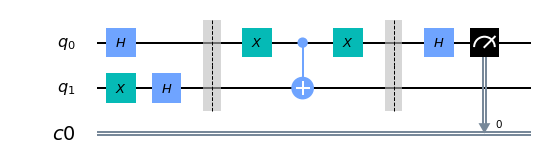

In [ ]:
circuit.draw(output="mpl")

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=100)
result = job.result()
counts = result.get_counts(circuit)

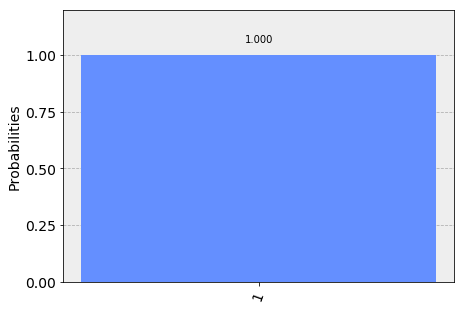

In [ ]:
plot_histogram(counts)

In [ ]:
if(counts.get('0') is not None and counts.get(1) is not None and counts.get('0') > counts.get('1')):
    print("The chosen function is constant.")
else:
    print("The chosen function is not constant.")

The chosen function is not constant.
